In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

# Ej Clasificación de Fashion MNIST

A partir de la notebook "Ejemplo-Fashion-MNIST.ipynb" armar una serie de clasificadores bayesianos:

1) Todos los pixels tiene la misma distribución de probabilidades para cada clase de grises y se generan de manera independiente.

2) Se separa la imagen en cuatro cuadrantes y los pixels de cada cuadrante tienen la misma distribución de probabilidades para cada clase y se generan de manera independiente.

Se pide estimar las probabilidades de niveles de grises para cada caso utilizando un subconjunto de entrenamiento de los datos y en función de esa estimación medir la performance del modelo con un subconjunto de validación

In [2]:
folder = './'
images = np.load(folder+'train_images.npy')
labels = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1,dtype=int)
images_test = np.load(folder+'test_images.npy')
labels_test = np.loadtxt(folder+'test_labels.csv', delimiter=',', skiprows=1,dtype=int)
labels_test = labels_test[:,0]

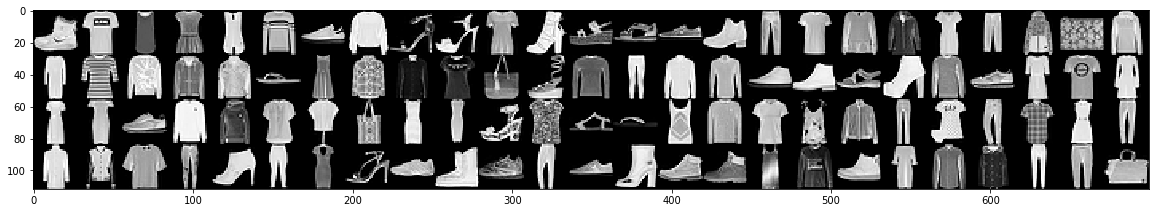

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

In [57]:
from MNIST_helper import plot_numbers
plot_numbers(images.reshape(-1,28,28),range(100), columns=25, figsize=(20, 20))
Counter(labels)

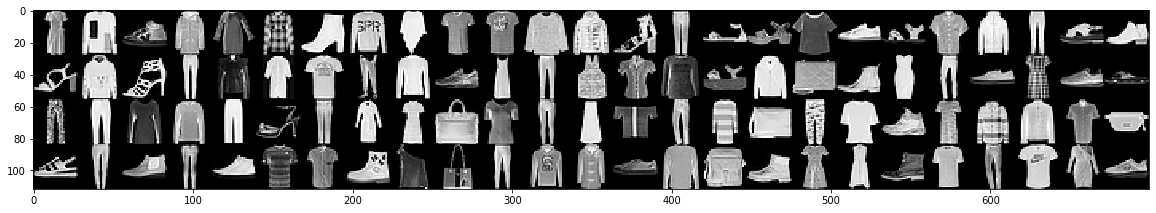

In [48]:
plot_numbers(images_test.reshape(-1,28,28),range(100), columns=25, figsize=(20, 20))

# Ejercicio 1: distribución de colores totales de imagen
Entrenamiento

In [98]:
%%time
from MNIST_helper import fit
likelihoods_train,priors_train=fit(images,labels)
print('Shape likelihoods_train:',likelihoods_train.shape)
print('Shape priors_train:',priors_train.shape)

Shape likelihoods_train: (10, 256)
Shape priors_train: (10,)
Wall time: 1.41 s


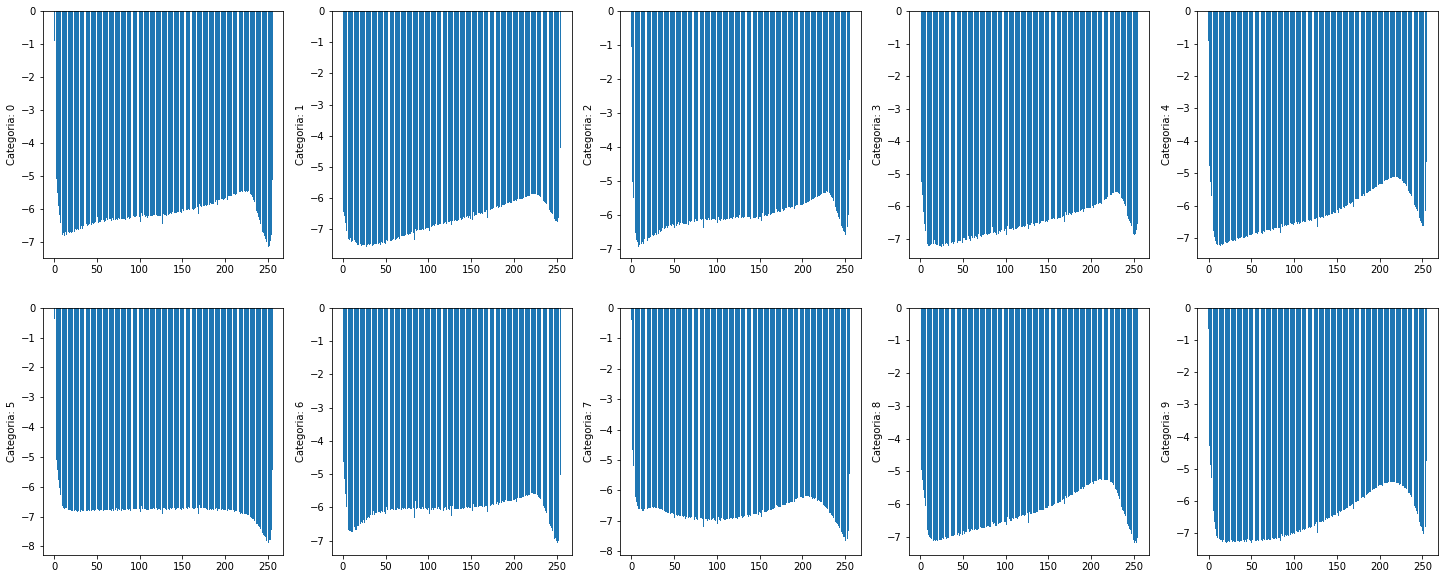

In [99]:
from MNIST_helper import plotHist
plotHist(likelihoods_train)


Predicción y Testeo


In [100]:
from MNIST_helper import tst
tst(likelihoods_train,priors_train,images_test,labels_test)

Shape ht_test: (10000, 256)
Shape classif: (10000,)
Accuracy: 0.3702


In [48]:
#Resuelto con Clases
from MNIST_helper import modelo
clf=modelo(256,'A')
clf.fit(images,labels)
acc=clf.score(images_test,labels_test)
print('Accuracy 1 solo cuadrante:',acc)

Accuracy 1 solo cuadrante: 0.3702


# Ejercicio 2: distribución de color en 4 cuadrantes

In [47]:
from MNIST_helper import modelo_4cuad
clf4=modelo_4cuad(256,'B')
lk=clf4.fit(images,labels)
print('Shape de matriz train:',lk.shape)
acc4c=clf4.score(images_test,labels_test)
print('Accuracy 4 cuadrantes:',acc4c)

Shape de matriz train: (10, 1024)
Accuracy 4 cuadrantes: 0.5174


In [54]:
clf5=modelo_4cuad(32,'B')
lk=clf5.fit(images,labels)
print('Shape de matriz train:',lk.shape)
acc4c=clf5.score(images_test,labels_test)
print('Accuracy 4 cuadrantes:',acc4c)

Shape de matriz train: (10, 128)
Accuracy 4 cuadrantes: 0.4965


# Ejercicio 3: distribución GAUSSIANA de color en 4 cuadrantes
(reduce la cantidad de parametros)

In [56]:
from scipy.stats import norm


In [62]:
gauss_params=[]
#for cat in range(10):
cat=0
means=np.mean(images[labels==cat], axis=0)
stds=np.std(images[labels==cat], axis=0)
gauss_params.append((means,stds))

In [60]:
stds.shape

(28, 28)